In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #rest are not required
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# **Data Wrangling**

In [2]:
# Load data
d = pd.read_csv('/content/heart_disease.csv')

• **age**: Age of the patient.

• **sex**: Sex of the patient (1 = male, 0 = female).

• **cp**: Chest pain type (0-3).

• **trestbps**: Resting blood pressure.

• **chol**: Serum cholesterol in mg/dl.

• **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

• **restecg**: Resting electrocardiographic results (0-2).

• **thalach**: Maximum heart rate achieved.

• **exang**: Exercise induced angina (1 = yes; 0 = no).

• **oldpeak**: ST depression induced by exercise relative to rest.

• **slope**: The slope of the peak exercise ST segment.

• **ca**: Number of major vessels (0-3) colored by fluoroscopy.

• **thal**: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

• **target**: Diagnosis of heart disease (1 = presence of heart disease; 0 = absence).

In [4]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
d.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
d.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

# **Exploratory Data Analysis**

<Axes: >

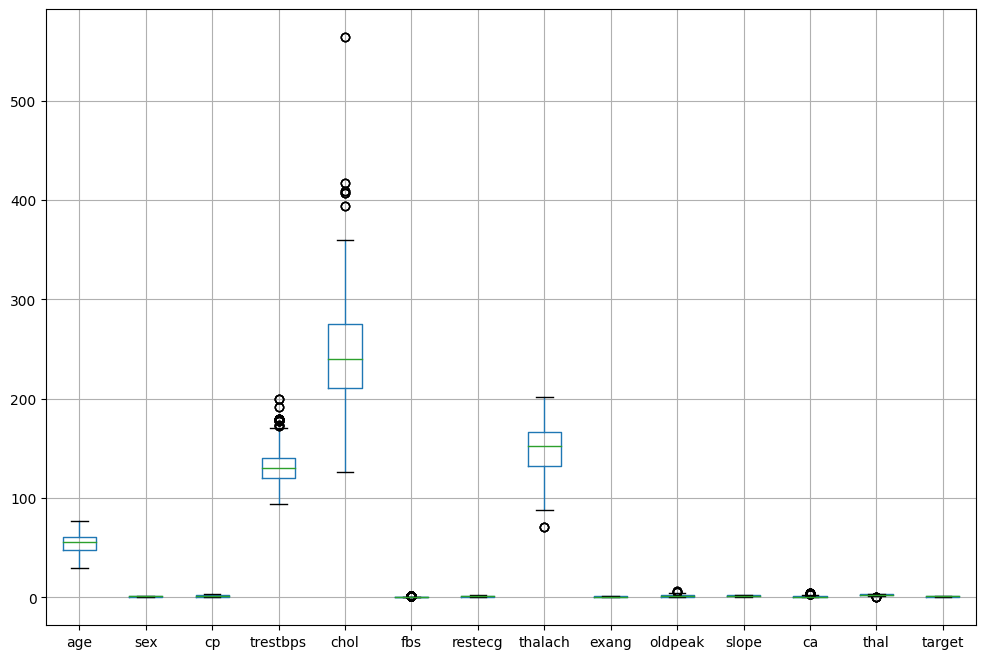

In [ ]:
plt.figure(figsize=(12,8))
d.boxplot()

The dataset demonstrates that there are notable outliers in age, cholesterol, blood pressure, and heart rate, even though most people have average values for these parameters. When predicting cardiac disease, categorical variables should be carefully considered as they have varying distributions.

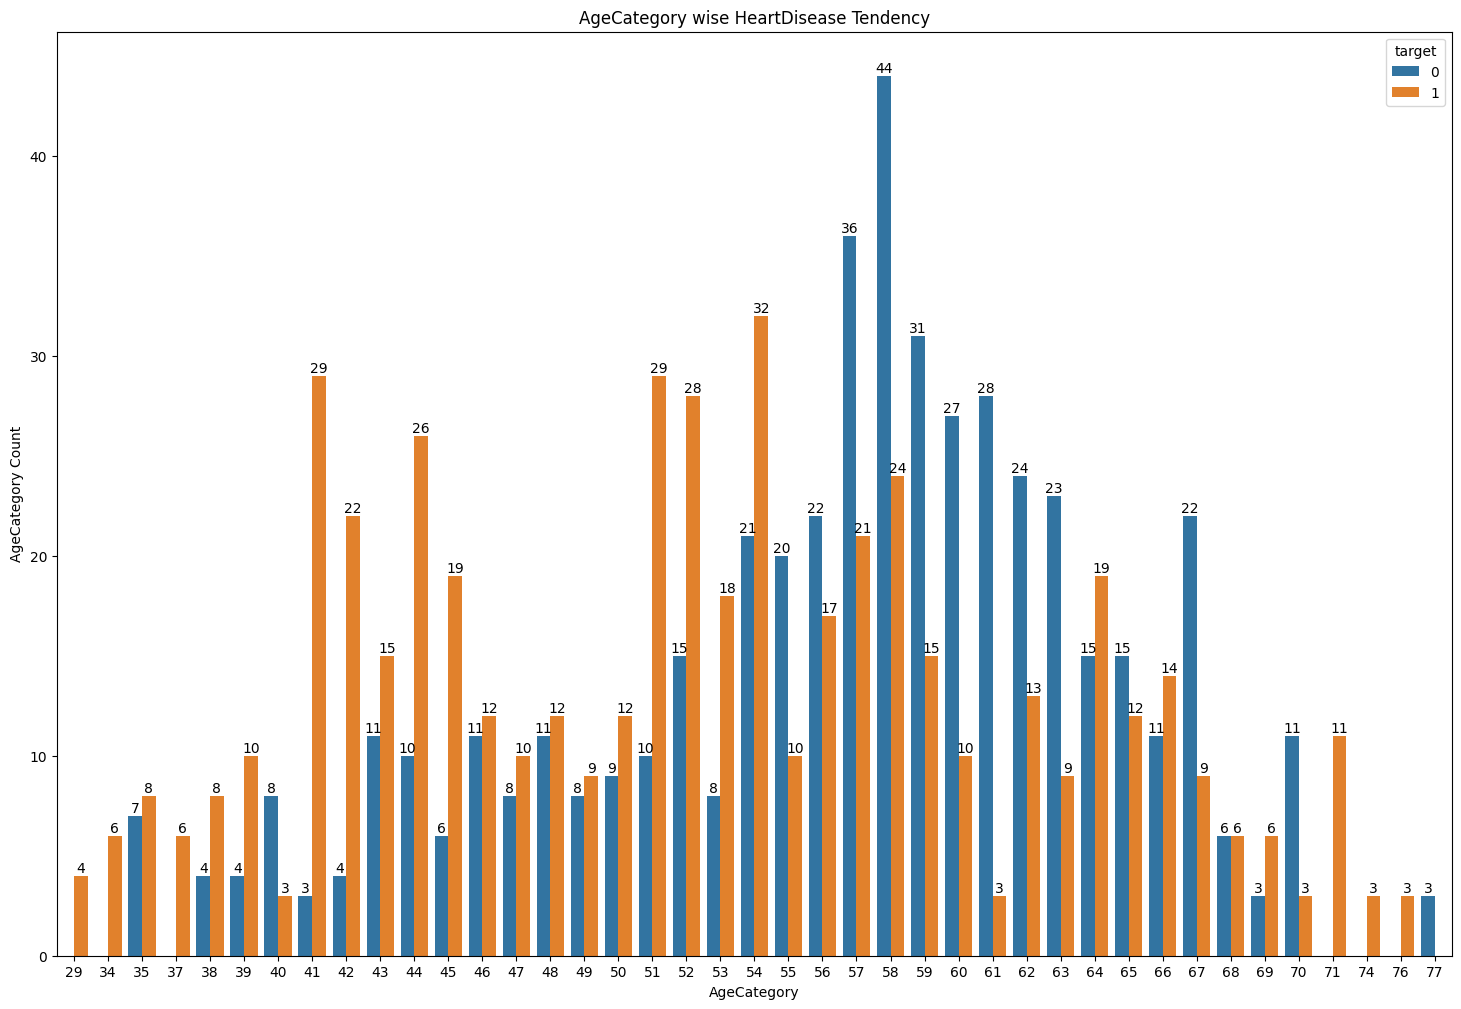

In [6]:
plt.figure(figsize=(18,12))
ax=sns.countplot(x='age', hue='target', data=d)
ax.set_xlabel( "AgeCategory")
ax.set_ylabel( "AgeCategory Count")
ax.set_title(  "AgeCategory wise HeartDisease Tendency")
for i in ax.containers:
  ax.bar_label(i)
plt.savefig('agedistribution.png')
plt.show()


*The above graph shows that heart disease prevalence varies with age, with a higher concentration of heart disease in certain age groups, particularly those between 40 and 60 years old.*

In [10]:
d.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
feature=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

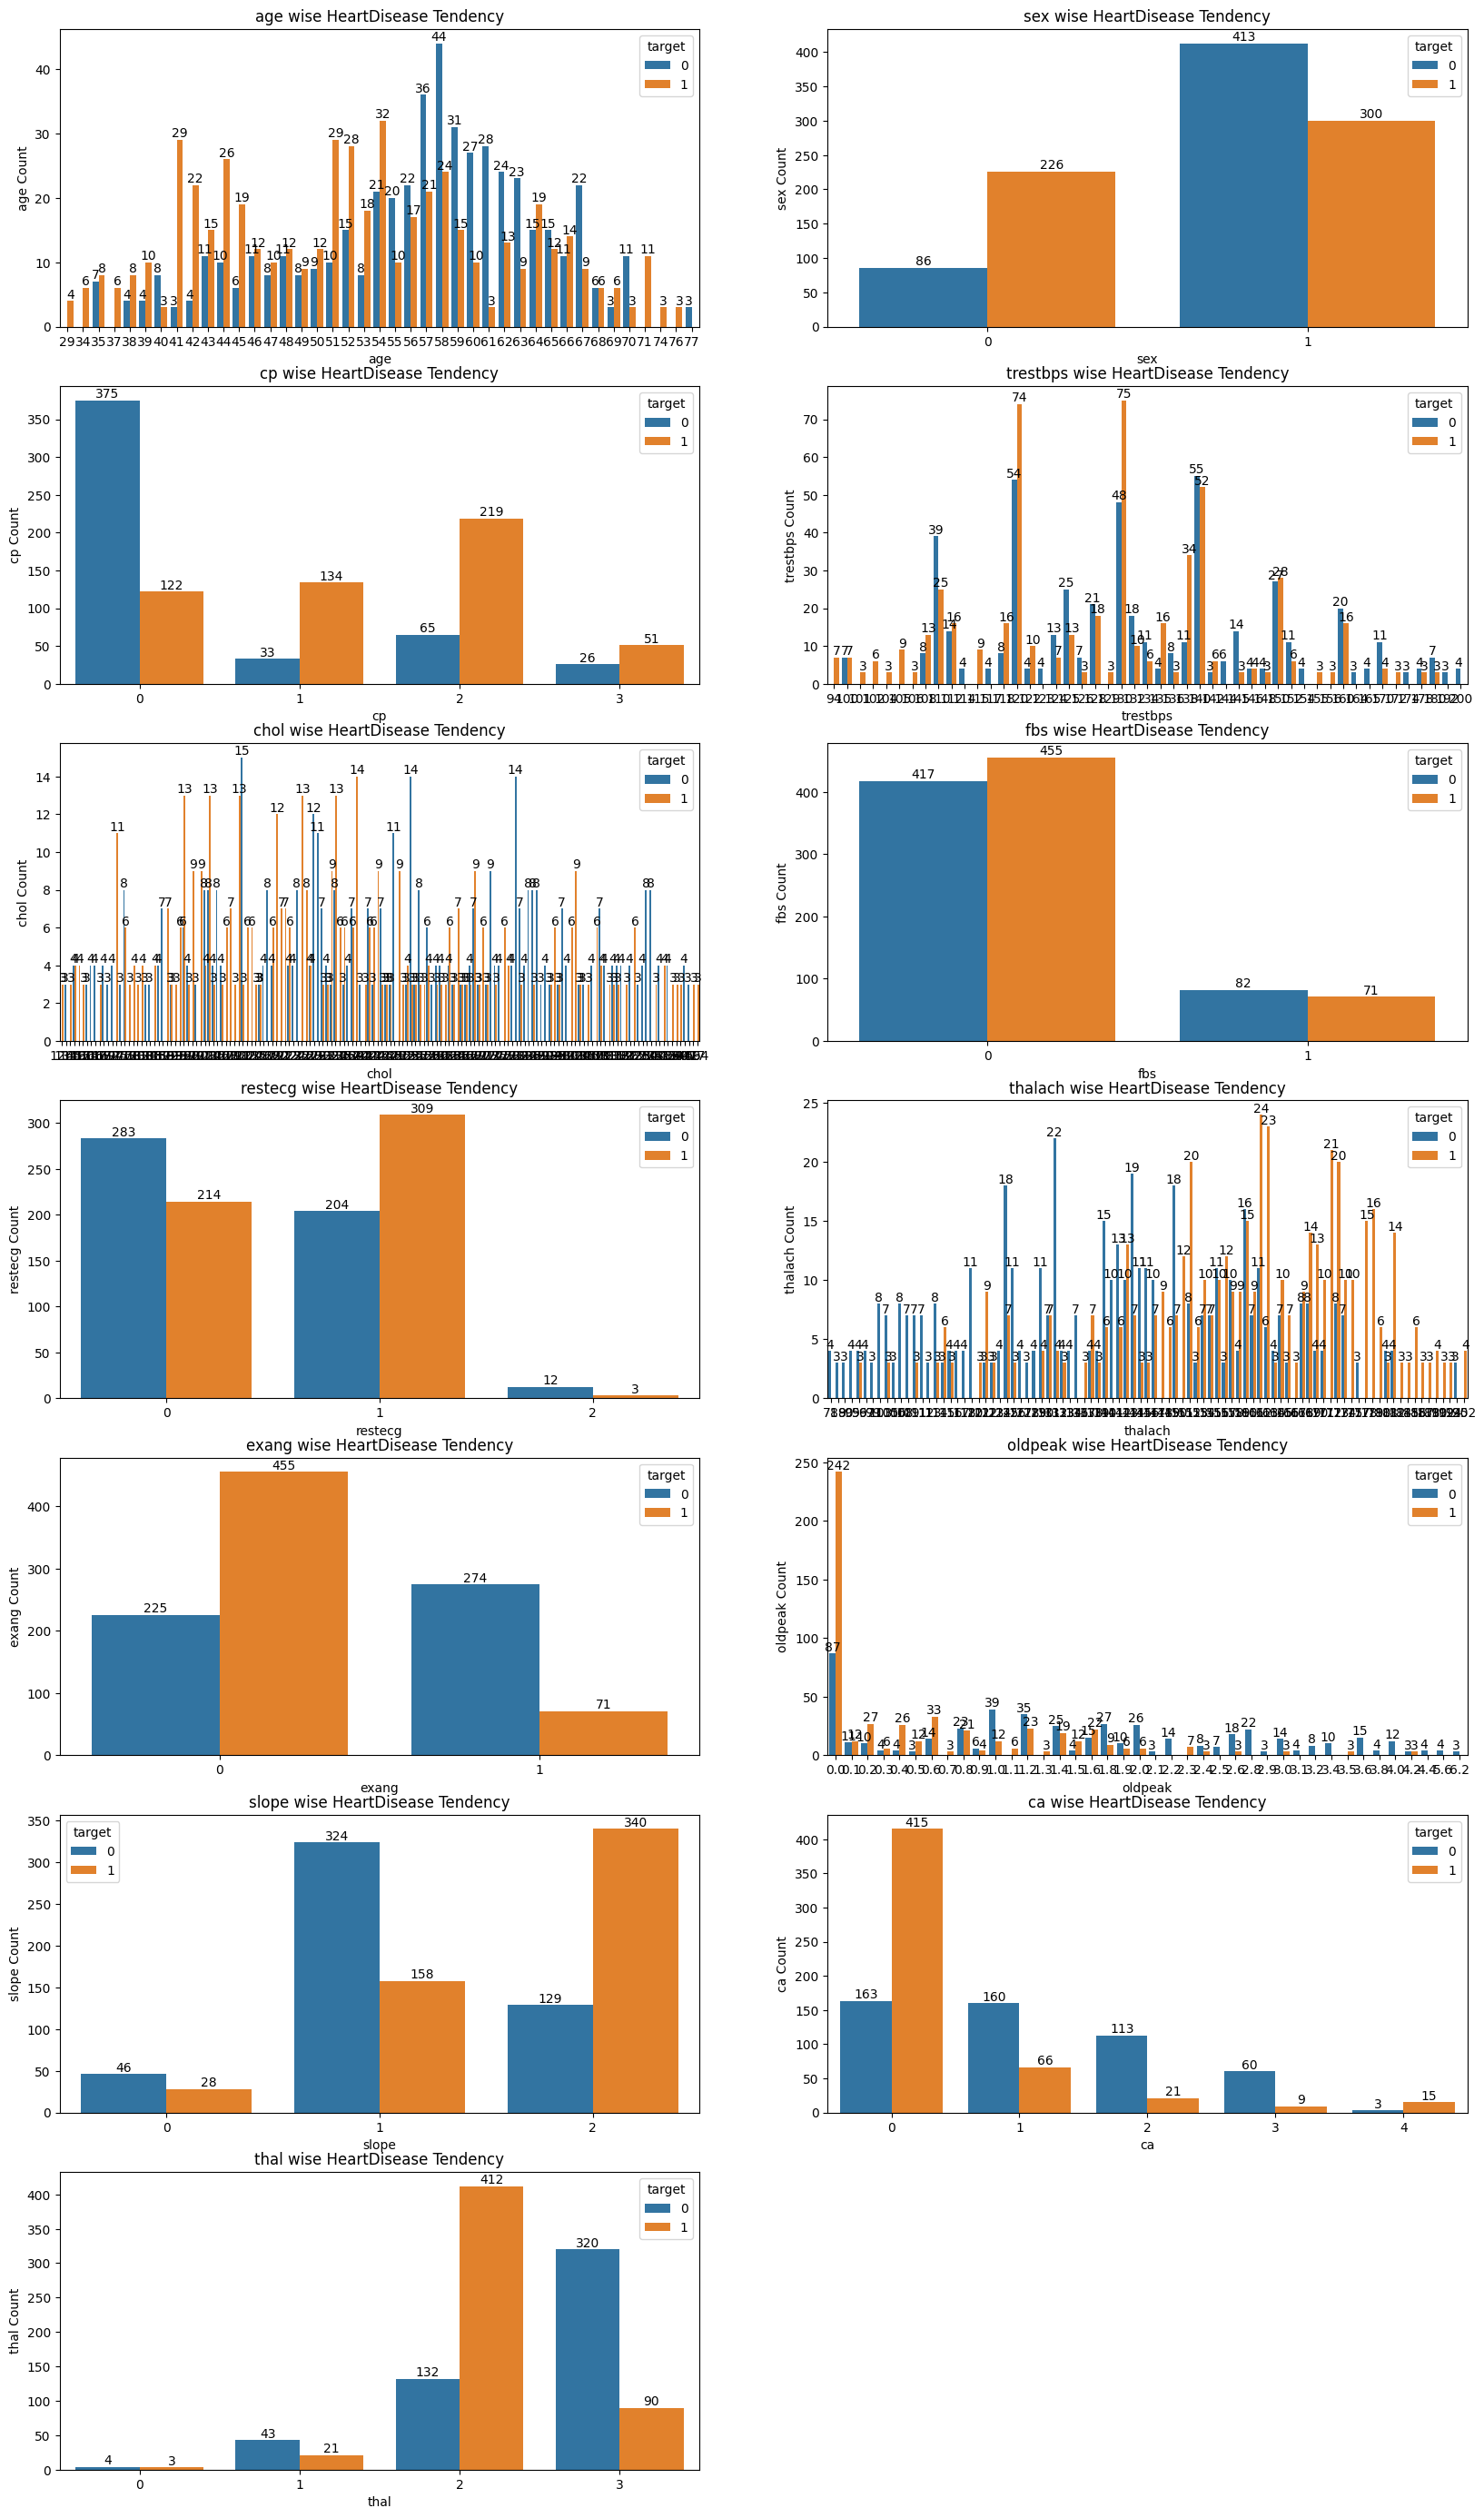

In [9]:
plt.figure(figsize=(20,40))
for i in range(1,14):

    plt.subplot(8,2,i)
    ax=sns.countplot(x=feature[i-1],hue='target',data=d)
    #ax.set_xlabel(i)
    ax.set_ylabel( '{} Count'.format(feature[i-1]))
    ax.set_title( '{} wise HeartDisease Tendency'.format(feature[i-1]))
    for i in ax.containers:
        ax.bar_label(i)
plt.savefig('HighProbabilityofHeartDisease.png')
plt.show()


High Probability of Heart Disease:
1. Female Person
2. Chest pain type (CP) > Value 1: typical angina
3. The slope of the peak exercise ST segment (slp) > Value 2: downsloping
4. (thall) Dipyridamole-Thallium scan results > Value 2: Fixed defect (no blood flow in some part of the heart)


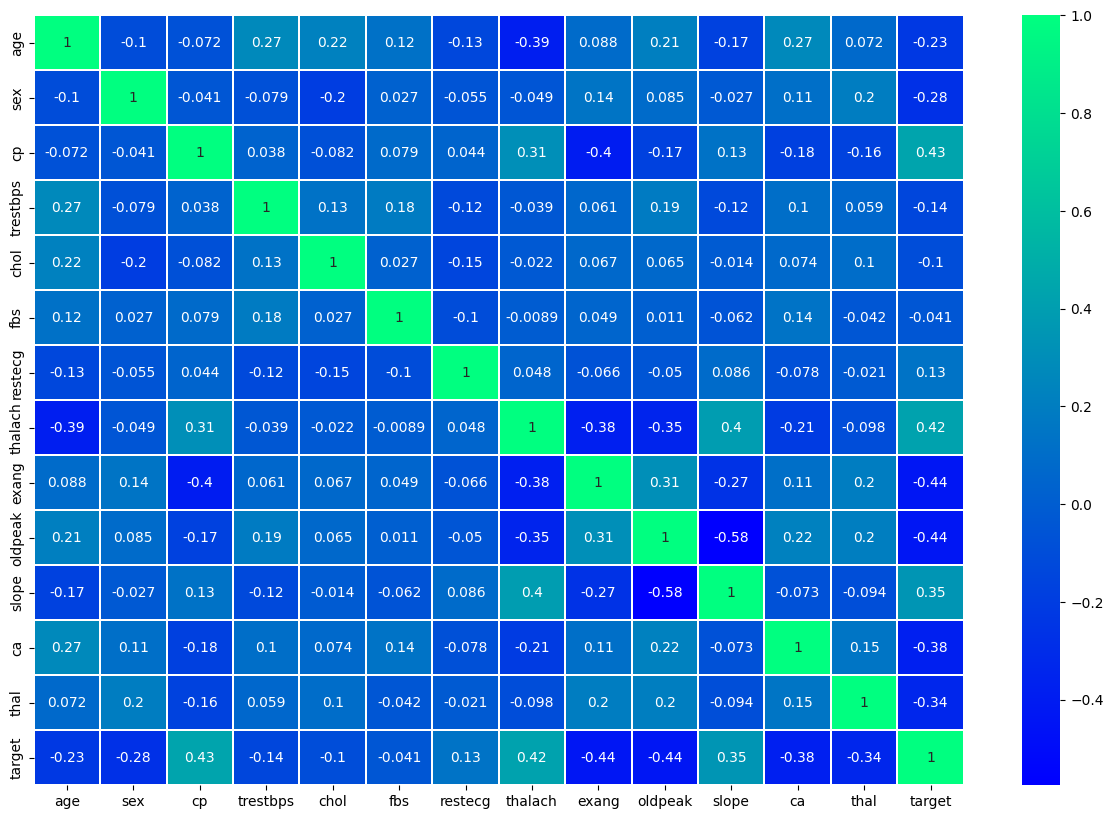

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(d.corr(),linewidth=.01,annot=True,cmap="winter")
plt.savefig('correlationfigure.png')
plt.show()


Maximum heart rate and age have a negative correlation, but resting blood pressure and cholesterol have a minor positive correlation. Heart disease is more common in men and in people who experience specific kinds of chest pain. Increased ST depression during exercise, together with lower maximal heart rates and the presence of exercise-induced angina, are strong markers of cardiac disease. Knowing these associations aids in the prognosis of cardiac disease and directs clinical judgments.

In [ ]:
d['sex'].value_counts(normalize=True)

sex
1    0.69561
0    0.30439
Name: proportion, dtype: float64

In [ ]:
d['target'].value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

In [ ]:
men = d[d['sex'] == 1]
women = d[d['sex'] == 0]

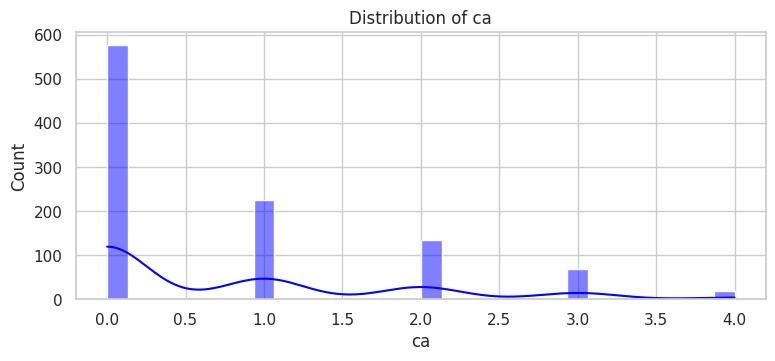

In [ ]:
sns.set(style="whitegrid")

# List of continuous variables
continuous_vars = ['ca']

# Plot distribution of continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
  plt.subplot(3, 2, i + 1)
  sns.histplot(d[var], kde=True, bins=30, color='blue')
  plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

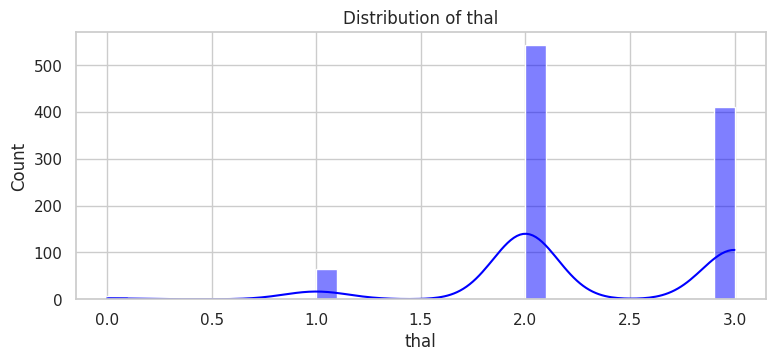

In [ ]:
sns.set(style="whitegrid")

# List of continuous variables
continuous_vars = ['thal']

# Plot distribution of continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
  plt.subplot(3, 2, i + 1)
  sns.histplot(d[var], kde=True, bins=30, color='blue')
  plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

Silent Carrier
alpha 1 gene which is 0
aa/a-
No symptoms or very mild anemia
----------------------------
**Alpha Thalassemia Minor (Trait)**
alpha 2 genes which is 11
a-/a- or aa/--
Mild anemia
----------------------------
**Hemoglobin H Disease**
alpha 3 genes which is 2
a-/--
Moderate to severe anemia
----------------------------
Alpha Thalassemia Major
Alpha 4 genes which is 3
Severe, often fatal without treatment

In [ ]:
d['thal'].unique()

array([3, 2, 1, 0])

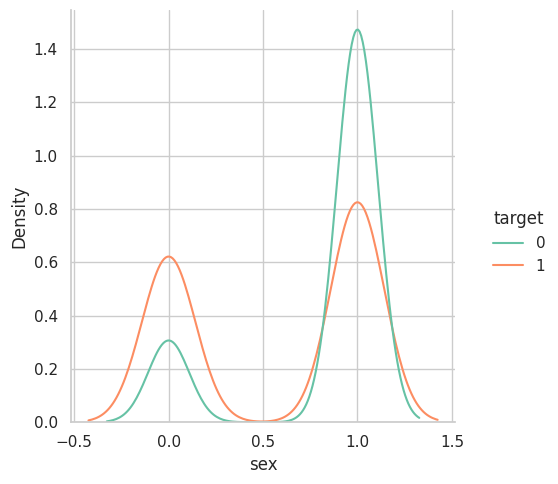

In [ ]:
sns.displot(x = 'sex' , hue = 'target' , data = d, palette='Set2',kind='kde')


According to the KDE plot, men are more likely than women to have heart disease, even though women often do not. This suggests variations in the prevalence of heart disease by gender, which can help direct preventive measures.




# **Machine Learning**

In [11]:
#inputs
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

* **Pre-processing**

In [12]:
x = d.drop(columns=['target'])
y = d['target']

In [13]:
# Identify categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [14]:
# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
 transformers=[
 ('num', numerical_transformer, numerical_cols),
 ('cat', categorical_transformer, categorical_cols)])

In [15]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

* **Logistic Regression**

In [16]:
# Logistic Regression
logistic_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',LogisticRegression())])
logistic_regression_pipeline.fit(x_train, y_train)
y_pred_lr = logistic_regression_pipeline.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.2f}, Precision: {precision_lr:.2f}, Recall:{recall_lr:.2f}, F1-Score: {f1_lr:.2f}")


Logistic Regression - Accuracy: 0.87, Precision: 0.86, Recall:0.90, F1-Score: 0.88


* **Decision Tree**


In [17]:
# Decision Tree
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',DecisionTreeClassifier())])
decision_tree_pipeline.fit(x_train, y_train)
y_pred_dt = decision_tree_pipeline.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}, Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f},F1-Score: {f1_dt:.2f}")

Decision Tree - Accuracy: 0.99, Precision: 1.00, Recall: 0.97,F1-Score: 0.99


* **Random Forest**


In [18]:
# Random Forest
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',RandomForestClassifier())])
random_forest_pipeline.fit(x_train, y_train)
y_pred_rf = random_forest_pipeline.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f},F1-Score: {f1_rf:.2f}")

Random Forest - Accuracy: 1.00, Precision: 1.00, Recall: 1.00,F1-Score: 1.00


* **Support Vector Macine**


In [19]:
# Support Vector Machine
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True))])
svm_pipeline.fit(x_train, y_train)
y_pred_svm = svm_pipeline.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM - Accuracy: {accuracy_svm:.2f}, Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f},F1-Score: {f1_svm:.2f}")


SVM - Accuracy: 0.95, Precision: 0.94, Recall: 0.97,F1-Score: 0.95


* **Gradient Boosting**


In [20]:
# Gradient Boosting
gradient_boosting_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier',GradientBoostingClassifier())])
gradient_boosting_pipeline.fit(x_train, y_train)
y_pred_gb = gradient_boosting_pipeline.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Accuracy: {accuracy_gb:.2f}, Precision: {precision_gb:.2f}, Recall:{recall_gb:.2f}, F1-Score: {f1_gb:.2f}")

Gradient Boosting - Accuracy: 0.99, Precision: 0.98, Recall:1.00, F1-Score: 0.99


In [21]:
# Compare models
performance_df = pd.DataFrame({
 "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Gradient Boosting"],
 "Accuracy": [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_gb],
 "Precision": [precision_lr, precision_dt, precision_rf, precision_svm, precision_gb],
 "Recall": [recall_lr, recall_dt, recall_rf, recall_svm, recall_gb],
 "F1-Score": [f1_lr, f1_dt, f1_rf, f1_svm, f1_gb]
})
print(performance_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.873171   0.855856  0.904762  0.879630
1        Decision Tree  0.985366   1.000000  0.971429  0.985507
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3                  SVM  0.951220   0.935780  0.971429  0.953271
4    Gradient Boosting  0.990244   0.981308  1.000000  0.990566


• Accuracy: All models performed reasonably well, with Gradient Boosting and
Random Forest achieving the highest accuracy.
• Precision: Gradient Boosting and Random Forest have the highest precision,
indicating they are better at predicting heart disease without many false positives.
• Recall: Gradient Boosting has the highest recall, meaning it is better at identifying
actual heart disease cases.
• F1-Score: Gradient Boosting also has the highest F1-score, indicating a good balance
between precision and recall.

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.873171   0.855856  0.904762  0.879630
1        Decision Tree  0.985366   1.000000  0.971429  0.985507
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3                  SVM  0.951220   0.935780  0.971429  0.953271
4    Gradient Boosting  0.990244   0.981308  1.000000  0.990566


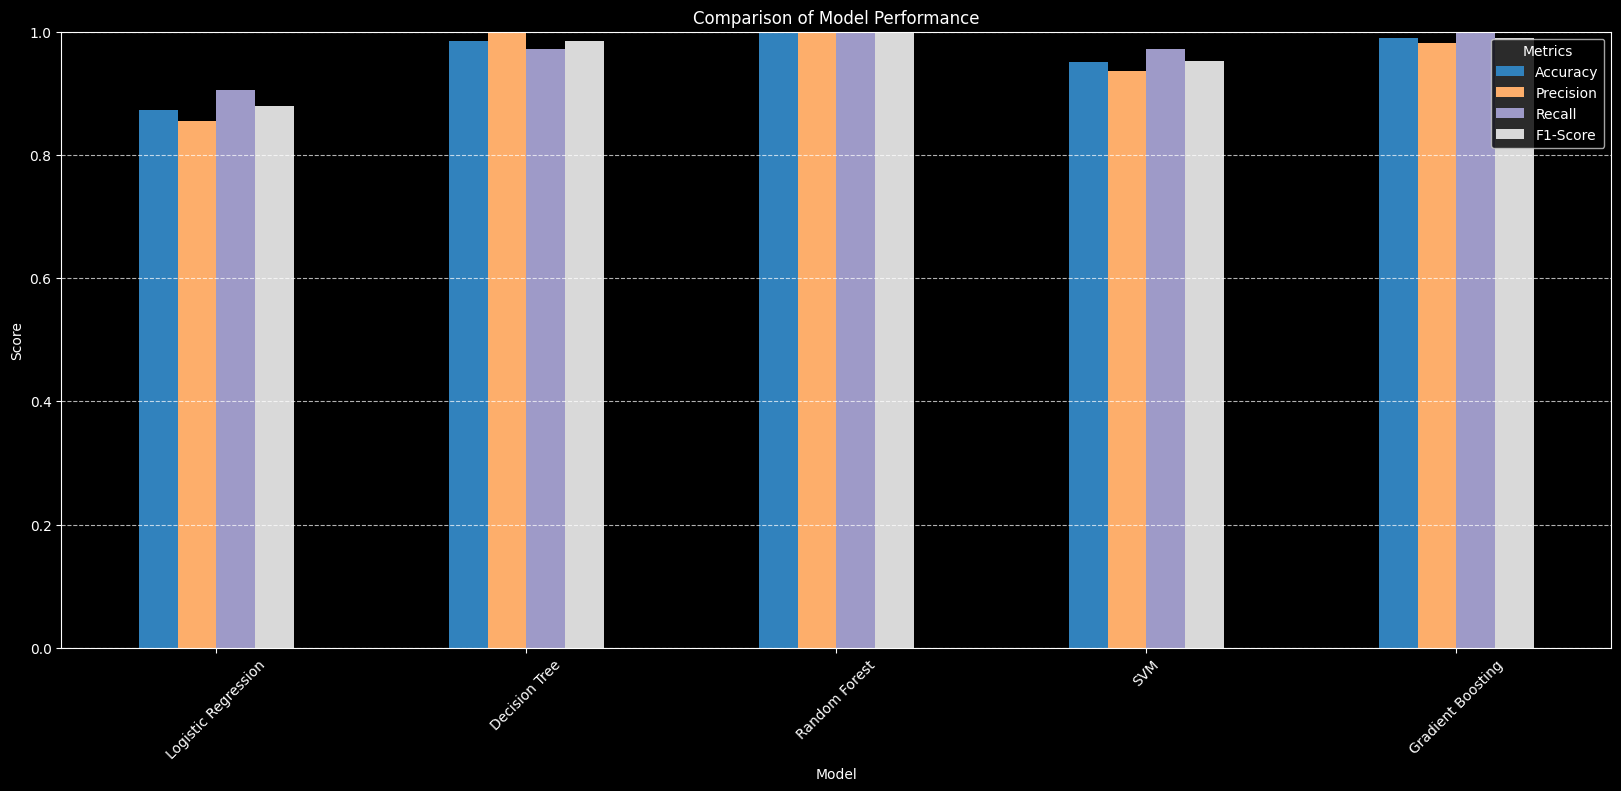

In [29]:
performance_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Gradient Boosting"],
    "Accuracy": [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_gb],
    "Precision": [precision_lr, precision_dt, precision_rf, precision_svm, precision_gb],
    "Recall": [recall_lr, recall_dt, recall_rf, recall_svm, recall_gb],
    "F1-Score": [f1_lr, f1_dt, f1_rf, f1_svm, f1_gb]
})

print(performance_df)


# Create a bar chart for the performance metrics
performance_df.set_index('Model').plot(kind='bar', figsize=(20,8), colormap='tab20c')

plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('age.png')
plt.show()

• Accuracy: Decision Tree and Random Forest models yielded the best results, while all models performed quite well overall.

• Precision: The best models for predicting heart disease without producing a lot of false positives are Decision Tree and Random Forest, with the highest precision.

• Recall: Random Forest is the best at recognizing real heart disease patients since it has the highest recall.

• F1-Score: Random Forest has the highest F1-score among the models, suggesting that recall and precision are well-balanced.


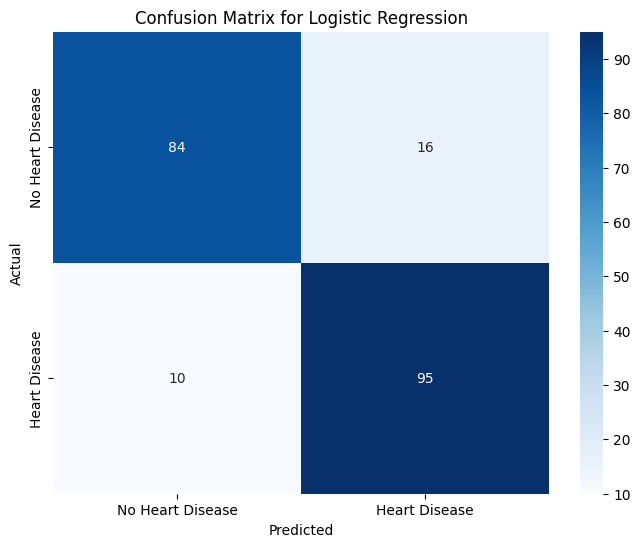

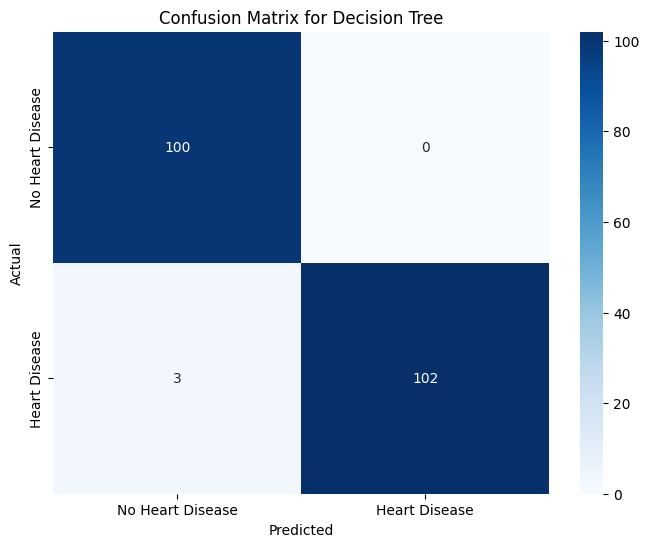

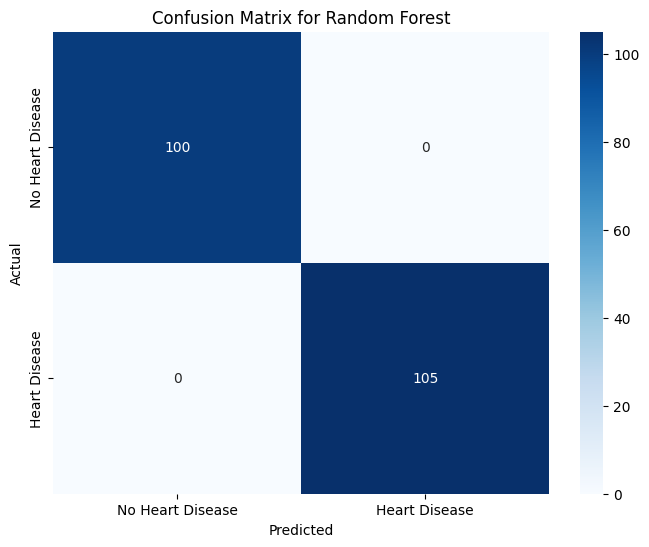

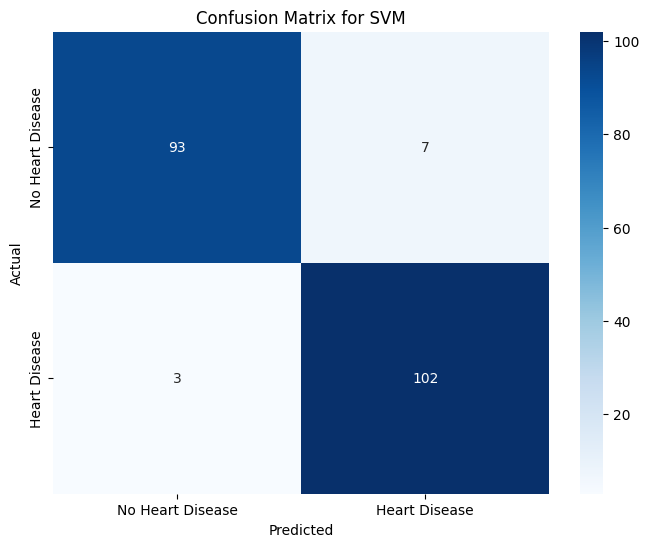

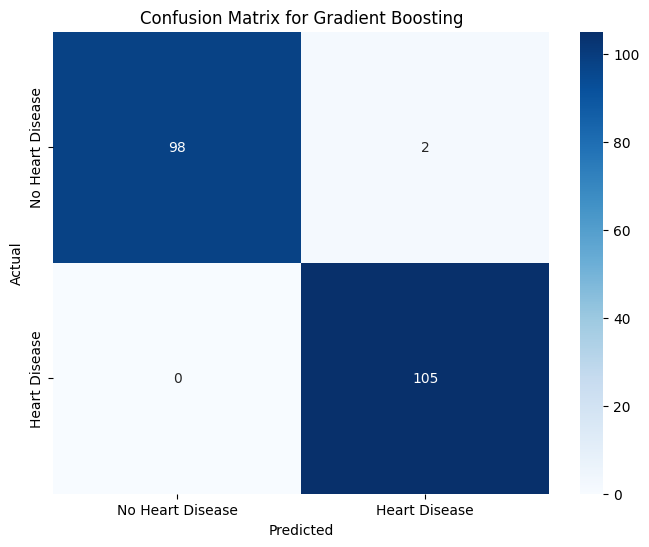

In [24]:
# Plot confusion matrix
for model_name, y_pred in [("Logistic Regression", y_pred_lr), ("Decision Tree", y_pred_dt),
("Random Forest", y_pred_rf), ("SVM", y_pred_svm), ("Gradient Boosting", y_pred_gb)]:
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
 xticklabels=['No Heart Disease', 'Heart Disease'],
 yticklabels=['No Heart Disease', 'Heart Disease'])
 plt.title(f'Confusion Matrix for {model_name}')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()


Confusion Matrix
• Decision Tree , Random Forest, and Gradient Boosting show a well-balanced
confusion matrix with fewer misclassifications.
• Logistic Regression has more false positives and false negatives compared to other models,
indicating potential overfitting or underfitting.
• SVM performs slightly better than Logistic Regression

###Conclusion

1. **Random Forest:** With the best accuracy, recall, F1-score, and precision among the models tested, this one performed best overall and required the fewest trade-offs.


2. **Gradient Boosting:** If model simplicity and interpretability are important to you, it is a good substitute that performs similarly to Random Forest.

3. **Decision Tree:** Performed exceptionally well in recall, making it a good option when determining the majority of positive cases is essential.

4. **Logistic Regression:** Did not perform as well as other models, suggesting a less robust model in this situation.

5. **SVM:** While still useful, SVM's recall was marginally lower than that of Random Forest and Gradient Boosting, which made it less suitable for situations in which finding every case of heart disease is crucial.


#Health Implication
It's critical to screen for heart disease on a regular basis, particularly for people between the ages of 40 and 60.

Effective preventative methods include blood pressure monitoring, cholesterol monitoring, and management of exercise-induced ST depression.


Heart disease can be detected early and treated promptly with the use of predictive models such as Random Forest and Decision Tree, which may lead to better patient outcomes.
